In [1]:
# The notebook contantains methodes for bin files reading and visualizing (IMU data)

In [28]:
from struct import *
import pandas as pd
import os.path as path
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
def load_data(file_name, sense_type):
    # sense_type: 'ACR', 'ACN', 'GYR', 'GYN', 'HUN', 'BAN', 'HTN', 'PTN', 'BTN'
    # If sense_type is in ['ACR', 'ACN', 'GYR', 'GYN'] then x, y, and z component are available and sense_type has 
    # additional last symbol 'C', otherwise the last symbol is 'N'. For example, 'ACRC' or 'BTNN'
    # The data field's mask is: 'SENSE_TYPE[s]'+'C[s]'+'x_value[f]'+'y_value[f]'+'z_value[f]'+'Time[f]' 
    # or 'SENSE_TYPE[s]'+'N[s]'+'value[f]'+'Time[f]'.

    # open and read data
    f = open(file_name, 'rb')
    data = f.read()
    f.close()
    
    
    # parse data fields
    position = 0
    counter = 0
    fields_found = {}
    triple_fields = ['ACRC', 'ACNC', 'GYRC', 'GYNC']
    single_fields = ['HUNN', 'BANN', 'HTNN', 'PTNN', 'BTNN']

    
    
    if sense_type + 'C' in triple_fields:
        data_series = pd.DataFrame(columns=['x', 'y', 'z', 'time'])
    elif sense_type + 'N' in single_fields:
        data_series = pd.DataFrame(columns=['value', 'time'])
    else:
        print 'Your provided sense type is not recognized!'
        return None
    
    while len(data) > 0:
        if position + 4 > len (data):
            break
        data_pos = data[position:position + 4]
        if data_pos in triple_fields:               
            # read triple component
            if data_pos[:-1] == sense_type:
                unpack_data = data[position + 4: position + 4 + 16]
                values = unpack('<ffff', unpack_data)
                data_series.loc[counter]= values
                #data_series.loc[counter]['y'] = values[1]
                #data_series.loc[counter]['z'] = values[2]
                #data_series.loc[counter]['time'] = values[3]
                counter += 1
            
        elif data_pos in single_fields:
            # read single component
            if data_pos[:-1] == sense_type:
                unpack_data = data[position + 4: position + 4 + 8]
                values = unpack('<ff', unpack_data)
                data_series.loc[counter]['value'] = values[0]
                data_series.loc[counter]['time'] = values[1]
                counter += 1
        
        # count data fields
        if (data_pos in triple_fields) or (data_pos in single_fields):
            if fields_found.has_key(data_pos):
                fields_found[data_pos] = fields_found[data_pos] + 1
            else:
                fields_found[data_pos] = 1
                
        # shift reading position
        position += 1
    
    # get detected fields info
    for key in fields_found.keys():
        print "For {:s} readed {:d} records".format(key, fields_found[key])
    
    return data_series


In [35]:
sense_data = load_data('/home/sholc/optic_env/sources/hdeer/data/dump_000001.bin', 'ACR')
print sense_data.shape
print sense_data.tail(10)


For HUNN readed 5009 records
For BTNN readed 5015 records
For HTNN readed 5024 records
For GYRC readed 4971 records
For ACRC readed 4972 records
(4972, 4)
             x         y         z          time
4962 -0.990058  0.002428  0.010723  1.503675e+09
4963 -0.991539  0.001942  0.010723  1.503675e+09
4964 -0.991045  0.001457  0.011454  1.503675e+09
4965 -0.990551  0.001457  0.011454  1.503675e+09
4966 -0.990551  0.001942  0.011697  1.503675e+09
4967 -0.991292  0.001942  0.011454  1.503675e+09
4968 -0.990305  0.001700  0.011210  1.503675e+09
4969 -0.991045  0.001214  0.011941  1.503675e+09
4970 -0.990305  0.001700  0.009748  1.503675e+09
4971 -0.990305  0.001942  0.010966  1.503675e+09


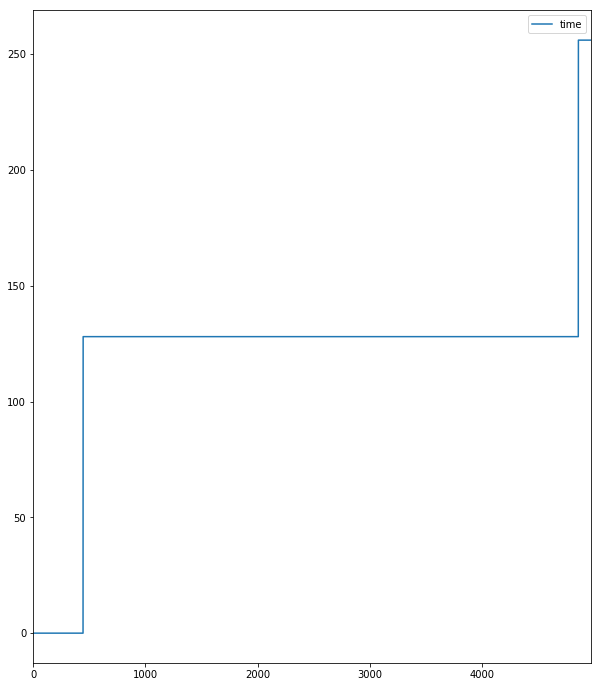

In [46]:
sense_data.plot(kind='line', y=['time'], figsize=(10, 12))

In [42]:
sense_data['time'] = sense_data['time'] - sense_data['time'].min()


             x         y         z   time
4962 -0.990058  0.002428  0.010723  256.0
4963 -0.991539  0.001942  0.010723  256.0
4964 -0.991045  0.001457  0.011454  256.0
4965 -0.990551  0.001457  0.011454  256.0
4966 -0.990551  0.001942  0.011697  256.0
4967 -0.991292  0.001942  0.011454  256.0
4968 -0.990305  0.001700  0.011210  256.0
4969 -0.991045  0.001214  0.011941  256.0
4970 -0.990305  0.001700  0.009748  256.0
4971 -0.990305  0.001942  0.010966  256.0


In [45]:
print sense_data.head(1000)

            x         y         z   time
0   -0.991786  0.001214  0.011210    0.0
1   -0.991292  0.001457  0.010966    0.0
2   -0.992032  0.003642  0.010235    0.0
3   -0.992032  0.001942  0.010235    0.0
4   -0.990058  0.001214  0.012429    0.0
5   -0.992526  0.001700  0.011454    0.0
6   -0.992279  0.001700  0.012429    0.0
7   -0.991292  0.001700  0.010235    0.0
8   -0.992279  0.002185  0.010723    0.0
9   -0.991292  0.001942  0.009748    0.0
10  -0.993020  0.001700  0.010479    0.0
11  -0.992032  0.001700  0.009748    0.0
12  -0.991539  0.001457  0.010966    0.0
13  -0.992526  0.002185  0.009992    0.0
14  -0.992773  0.001457  0.009748    0.0
15  -0.991292  0.001700  0.010723    0.0
16  -0.993760  0.001214  0.011697    0.0
17  -0.989317  0.001942  0.011941    0.0
18  -0.990798  0.001457  0.011454    0.0
19  -0.991786  0.002914  0.009017    0.0
20  -0.990551  0.000486  0.009992    0.0
21  -0.992279  0.001700  0.007311    0.0
22  -0.990058  0.001942  0.012185    0.0
23  -0.990058  0